# A Look Ahead to Kinetics

The acetolysis of t-butanol is an acid-catalyzed first order reaction. Let us examine the mechanism and reaction kinetics.

<img src="images/Reaction.png" width=250 class=center />


## Mechanism

The mechanism involves activation of the hydroxide group by protonation.  This makes it a good leaving group and the water can depart giving us the carbocation intermediate. This intermediate will then be quickly attacked by a nucleophile. there will be a very small amount of the water product and an enormous amount of acetic acid solvent as choices of nucleophile. the acetic acid ads to the cation and then the proton is accepted back to the solvent system from whence is came.

<img src="images/Mech.png" width=600 class=center />

The acid proton is returned to the solvent system and the activity of acid proton does not change as the reaction proceeds. This is an example of catalysis by acid.

## Rate Scheme

We can schematically represent the rate of each step as in the scheme below. 

<img src="images/Scheme.png" width=400 class=center />

The first step is equilibrium protonation of the alcohol group. This will be deteremined by the $pK_a$ of the protonated alcohol and the acidity function ($pH$ or $H_0$) of the solvent system. The rate-determining-step is the formation of the hig-energy carbocation intermediate. This step is reversible is the water leaving group adds back. In the initial stages of the reaction the concentration of water will be almose zero and we can ignore the reverse reaction. The subsequent steps are much faster that the RDS and do not matter in controlling the observed rate of reaction.

## The Rate Law

The rate law can be determined from the reaction scheme. the rate of product formation is controlled by the rate-determing-step. The rate law can be expressed as...

$$\frac{\partial}{\partial t}\left[P\right]=k_1 \left[BH^+\right]$$

The concentration of $BH^+$ can be expressed in terms of the total amount of $B$ present and the $K_a$ of the acidic form of $B$.

$$\left[B_{t}\right] = \left[B\right] + \left[BH^+\right]$$

$$ K_a = \frac{\left[B\right] \left[H^+\right]}{\left[BH^+\right]}$$

We substitute one equation onto the other...

$$\left[B_{t}\right] = \frac{K_a \left[BH^+\right]}{\left[H^+\right]} + \left[BH^+\right]$$

$$\left[BH^+\right] = \frac{\left[H^+\right]}{K_a + \left[H^+\right]}\left[B_{t}\right]$$

We now can combine the statement for $\left[BH^+\right]$ and for $\frac{\partial}{\partial t}\left[P\right]$ to get the rate law.


$$\frac{\partial}{\partial t}\left[P\right]=k_1 \frac{\left[H^+\right]}{K_a + \left[H^+\right]}\left[B_{t}\right]$$

We have observed that the concentration of acid will not change. So $\left[H^+\right]$ is a constant. We can combine all the constants into a single value. We can state that$\ldots$

$$k_{obs}=k_1 \frac{\left[H^+\right]}{K_a + \left[H^+\right]}$$

and that$\ldots$

$$\frac{\partial}{\partial t}\left[P\right]=k_{obs}\left[B_{t}\right]$$

The rate law is the classic first order rate law. 

## Rate dependance on Acidity

Obviously in any given acid environment the value of $k_{obs}$ will be constant. But, $k_{obs}$ can change if we chage the reaction conditions by increasing the acidity.  The easiest way to increase the acidity of neat acetic acid is to ad a bit of sulphuric acid. Sulfate is a very weak nucleophile and a strong leaving group. It will not compete with acetetic acid for adding to the cation.

The $H_0$ values of mixtures of acetic acid and sulphuric acid have been measured

"The Acidity Scale in Glacial Acetic Acid. I. Sulfuric Acid Solutions. $-6 < H_0 < 0$." Norris F. Hall and Willard F. Spengeman, *J. Am. Chem. Soc.*, **1940**, *62*, 2487-2492. [https://doi.org/10.1021/ja01866a062](https://doi.org/10.1021/ja01866a062)

Below is a plot of the $H_0$ values reported by Hall and Spengeman in 1940. This work may well have won the war for the Allies.

**Note**: the code below includes a data smoothing method to create the line.  The line is not a line fit, it is a smoothed representation of the data. I stole the code from [here](https://towardsdatascience.com/data-smoothing-for-data-science-visualization-the-goldilocks-trio-part-1-867765050615).





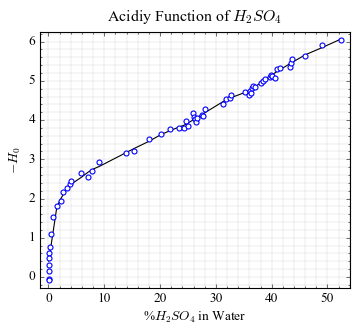

In [34]:
file_path = "data/"
file_name = "AceticAcid_H2SO4_H0_Values.csv"  

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

############################
### Set global variables ###
############################

github_data_location = "https://github.com/blinkletter/LFER-QSAR/blob/main/data/"
github_styles_location = "https://github.com/blinkletter/LFER-QSAR/blob/main/styles/"
github_download = "?raw=True"

############################


df = pd.read_csv(file_path+file_name, skipinitialspace=True, comment='#') 
#display(df)

df.sort_values(by=['%H2SO4'], inplace=True)
#display(df)

y = df['H0']
x = df['%H2SO4']


style_file_path = github_styles_location
style = "S2_classic2.mplstyle"
plt.style.use(style_file_path+style+github_download)        
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))  


###################################
### Data smoothing using LOWESS ###
###################################

# See https://towardsdatascience.com/data-smoothing-for-data-science-visualization-the-goldilocks-trio-part-1-867765050615

x1 = list(x)
y1 = list(-y)

from statsmodels.nonparametric.smoothers_lowess import lowess
lowess_smooth = lowess(y1, x1, frac = .2)

x2 = lowess_smooth[:,0]
y2 = lowess_smooth[:,1]
plt.plot(x2,y2,"k-")

###########################
### Plot data as points ###
###########################

ax.set(title=r"Acidiy Function of $H_2SO_4$",       
       ylabel=r"$-H_0$", 
       xlabel="%$H_2SO_4$ in Water",                
#       xlim=[2,10],                  
#       ylim=[17,21.5]
      )                   

plt.plot(x,-y,".")

ax.margins(x=.03, y=.03, tight=True)
plt.show()

The acidity increases rapidly as $H_2SO_4$ is added because it is an extremely strong acid. It won't take much to triple the value of $k_{obs}$.

## Rate vs. $H_0$

The $H_0$ of neat acetic acid is 0.2. Every 0.5 log units is about a 3-fold difference in protonating power. So we are shooting for an $H_0$ of -0.3. I checked the data table for the plot above and found an acid mixture that results in an $H_0$ near –0.3.

In [2]:
display(df)

,%H2SO4,H0,indicator,indicator_pKa
59,0.030,0.05,2-nitroaniline,-0.17
0,0.031,0.09,4-chloro-2-nitroaniline,-0.91
1,0.050,-0.14,4-chloro-2-nitroaniline,-0.91
60,0.055,-0.30,2-nitroaniline,-0.17
61,0.090,-0.60,2-nitroaniline,-0.17
...,...,...,...,...
30,43.450,-5.46,"2,4-dichloro-6-nitroaniline",-3.67
58,43.710,-5.57,"N,N-Dimethyl-2,3,6-trinitroaniline",-4.73
45,46.040,-5.64,"2,6-dinitro-4-methylaniline",-4.45
46,48.940,-5.91,"2,6-dinitro-4-methylaniline",-4.45


It appears that if I use a 0.055% mixture I will have $H_0 = 0.30$. Let us calculate the new value of $k_{obs}$.

The rate will triple if the value of $k_{obs}$ triples

$$\frac{\partial}{\partial t}\left[P\right]=k_{obs}\left[B_{t}\right]$$

and

$$k_{obs}=k_1 \frac{\left[H^+\right]}{K_a + \left[H^+\right]}$$

The typical $pK_a$ value of a protonated alcohol in water is near $-2$ in water.  I will assume that it is similar in acetic acid so I will state that $pK_a = -2$ 

We can write the equation for $k_{obs}$ in terms of out logarithmic parameters like so$\ldots$

$$k_{obs}=k_1 \frac{10^{-H_0}}{10^{-pK_a} + 10^{-H_0}}$$

We don't know $k_1$ but we know $H_0$ and $K_a$. We can state that$\ldots$ 

$$k_{obs}=k_1 \cdot f$$

where

$$f= \frac{10^{-H_0}}{10^{-pK_a} + 10^{-H_0}}$$

So we can calculate the realtive value of $k_{obs}$ in the two acid mixtures using the code below.



In [3]:
H0 = 0.2
pKa = -2

# calculate the Kobs in terms of k1.

f = 10**(-H0)/(10**(-pKa)+10**(-H0))

print(f"The value of k_obs at H0 = {H0:0.2f} is k1*{f:0.4f}")

H0 = -.3
pKa = -2

# calculate the Kobs in terms of k1.

f2 = 10**(-H0)/(10**(-pKa)+10**(-H0))

print(f"The value of k_obs at H0 = {H0:0.2f} is k1*{f2:0.4f}")

ratio = f2/f

print(f"The ratio of the kobs values is {ratio:0.2f}")

The value of k_obs at H0 = 0.20 is k1*0.0063
The value of k_obs at H0 = -0.30 is k1*0.0196
The ratio of the kobs values is 3.12


Is it true that if we triple the acidity again we will triple the rate again? Lets just copy and paste and try it.

In [4]:
H0 = -0.3
pKa = -2

# calculate the Kobs in terms of k1.

f = 10**(-H0)/(10**(-pKa)+10**(-H0))

print(f"The value of k_obs at H0 = {H0:0.2f} is k1*{f:0.4f}")
H0 = -0.8
pKa = -2

# calculate the Kobs in terms of k1.

f2 = 10**(-H0)/(10**(-pKa)+10**(-H0))

print(f"The value of k_obs at H0 = {H0:0.2f} is k1*{f2:0.4f}")

ratio = f2/f

print(f"The ratio of the kobs values is {ratio:0.2f}")

The value of k_obs at H0 = -0.30 is k1*0.0196
The value of k_obs at H0 = -0.80 is k1*0.0594
The ratio of the kobs values is 3.03


Yes it stayed true but the increase was slightly less than the previous ration of 3.12. lets make a quick plot over a wider range of H0 values.

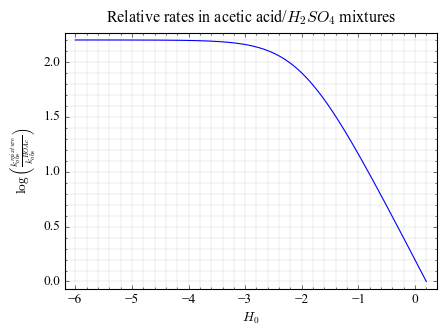

In [5]:
pKa = -2
H0_start = 0.2
H0_series = np.linspace(0.2, -6, 200)

f_start = 10**(-H0_start)/(10**(-pKa)+10**(-H0_start))

f_series = 10**(-H0_series)/(10**(-pKa)+10**(-H0_series))
#display(f_series)
#display(f_start)

relative_rate_series = f_series/f_start

# Make Plot

x = H0_series
y = relative_rate_series


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,4))  

ax.set(title=r"Relative rates in acetic acid/$H_2SO_4$ mixtures",       
       ylabel=r"$\log \left( \frac{k_{obs}^{mixture}}{k_{obs}^{HOAc}} \right)$", 
       xlabel=r"$H_0$",                
#       xlim=[9.5,13],                  
#       ylim=[17,21.5]
      )                   

ax.margins(x=.03, y=.03, tight=True)
plt.plot(x,np.log10(y),"-")


plt.show()

Interesting.  When the $H_0$ is above the $pK_a$, the rate increases linearly with increasing acid activity. A 10-fold increase in acidity will give a 10-fold increase in rate. But when $H_0$ is below the $pK_a$ we see the relative rate reach a maximum.